<a href="https://colab.research.google.com/github/AlineBarrucci26/AlineBarrucci26/blob/main/tcc_date_science_v2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importando Bibliotecas


In [3]:
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.5 MB/s 
     |████████████████████████████████| 235 kB 36.1 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=d709186ef95bf752d8f878633cc874154c9b88b712f55c85d20d031da40e5262
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy


In [ ]:
pip install git+https://github.com/robertmartin8/PyPortfolioOpt

  Cloning https://github.com/robertmartin8/PyPortfolioOpt to /tmp/pip-req-build-808d3pi6
  Running command git clone -q https://github.com/robertmartin8/PyPortfolioOpt /tmp/pip-req-build-808d3pi6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.7 MB 5.1 MB/s 
  Created wheel for pyportfolioopt: filename=PyPortfolioOpt-1.4.2-py3-none-any.whl size=59623 sha256=ae2a53eb80b80dbcf8f2dfd0e884775c053d80dbeb6576b459b32dfa9bfe8507
  Stored in directory: /tmp/pip-ephem-wheel-cache-fq30jgul/wheels/cd/d3/75/98b790a90e1312874fc303d02cef66fda52219f521652b70c9
Successfully built pyportfolioopt
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [15]:
import pandas as pd
import investpy 
import numpy as np
from time import sleep

##2. Construindo Portfólio

Iremos criar um benchmark para comprar modelos otimizaçao e parâmetros através dos indicadores: volatilidade e retorno anualizado.

- Pesos flat 25% para cada ativo
- Treino 2012 a 2018
- Teste 2019 a 2020

In [19]:
ativos = ['ABEV3','BBDC4','BRKM5','CIEL3','CSAN3','EGIE3','ENBR3','EZTC3','GOLL4','ITSA4','LAME4','MRVE3','PETR4','RENT3','SUZB3','UGPA3',
          'VVAR3','B3SA3','BEEF3','BRML3','CMIG4','CSNA3','ELET3','ENEV3','FLRY3','HGTX3','ITUB4','LREN3','MULT3','PRIO3','SANB11','TAEE11',
          'USIM5','WEGE3','BBAS3','BRAP4','BTOW3','CPFE3','CYRE3','ELET6','ENGI11','GGBR4','HYPE3','JBSS3','MGLU3','PCAR3','QUAL3','SBSP3',
          'TIMS3','VALE3','YDUQ3','BBDC3','BRFS3','CCRO3','CPLE6','ECOR3','EMBR3','EQTL3','GOAU4','IGTA3','JHSF3','MRFG3','PETR3','RADL3','SULA11','TOTS3','VIVT3','VIVT3']

carteira_passado = pd.DataFrame()
from time import sleep
for i in ativos:
  df_passado = investpy.get_stock_historical_data(stock=i, country='Brazil', from_date='01/01/2018', to_date='31/12/2018').Close
  df_passado.rename(i,inplace=True)
  df_passado.columns = [i]
  carteira_passado = pd.concat([carteira_passado, df_passado], axis=1)
  carteira_passado.index.name="Date"
carteira_passado


ConnectionError: ignored

In [ ]:
carteira_futuro = pd.DataFrame()

for i in ativos:
  df_futuro = investpy.get_stock_historical_data(stock=i, country='Brazil', from_date='01/01/2019', to_date='31/12/2020').Close
  df_futuro.rename(i,inplace=True)
  df_futuro.columns = [i]
  carteira_futuro = pd.concat([carteira_futuro, df_futuro], axis=1)
  carteira_futuro.index.name="Date"
carteira_futuro

,ITSA4,PETR4,VALE3,ABEV3
Date,,,,
2019-01-02,10.98,23.29,47.77,15.33
2019-01-03,11.08,23.86,45.82,15.50
2019-01-04,11.04,23.93,48.80,15.71
2019-01-07,11.03,24.30,48.54,15.64
2019-01-08,11.18,24.16,49.01,15.33
...,...,...,...,...
2020-12-22,11.40,27.28,86.94,15.51
2020-12-23,11.67,27.95,87.36,15.50
2020-12-28,11.80,28.18,87.31,15.77


In [ ]:
#Pesos dummy

pesos = np.array([0.25,0.25,0.25,0.25])

##3. Anualizando Retornos

In [ ]:
cf_anualizado = (carteira_futuro.iloc[-1]-carteira_futuro.iloc[0])/carteira_futuro.iloc[0]
cf_anualizado = ((1+cf_anualizado)**(12/48))-1
cf_anualizado

ITSA4    0.016656
PETR4    0.050286
VALE3    0.163191
ABEV3    0.005178
dtype: float64

In [ ]:
cf_anualizado_carteira = cf_anualizado.dot(pesos)
cf_anualizado_carteira

0.05882780858030917

##4. Volatilidade da Carteira

In [ ]:
carteira_futuro_retornos = carteira_futuro.pct_change()
cov_fut = carteira_futuro_retornos.cov()

vol_fut_diaria = np.sqrt(np.dot(pesos.T, np.dot(cov_fut,pesos)))
vol_fut_ano = vol_fut_diaria*np.sqrt(252)
vol_fut_ano

0.3479202990483084

##5. Estimando Retornos

##5.1. Retorno médio Histórico

Calcula a média anaulizada dos retornos históricos dos preços (diários). Usar o argumento compounding se necessário para mudar de média geométrica para média aritmética.

In [ ]:
from pypfopt import expected_returns

In [ ]:
#Calcular o retorno médio histórico carteira passado

retorno_medio = expected_returns.mean_historical_return(carteira_passado)

retorno_medio

ITSA4    0.364123
PETR4    0.507266
VALE3    0.570595
ABEV3   -0.023191
dtype: float64

In [ ]:
#EMA Retorno médio histórico

ema_retorno_medio = np.sum(np.abs(retorno_medio-cf_anualizado))/len(retorno_medio)
ema_retorno_medio

0.31005492993459083

##5.2. Média Móvel Exponencial

Calcula a média móvel exponencial dos preços diários. O argumento compounding altera de geométrico para artimética. Argumento Span é o tamanho da janela (default 500). 

In [ ]:
#Média Movel Exponencial 

mme = expected_returns.ema_historical_return(carteira_passado, span=300)
mme

ITSA4    0.346252
PETR4    0.467731
VALE3    0.187745
ABEV3   -0.261248
Name: 2018-12-28 00:00:00, dtype: float64

In [ ]:
#Erro médio Absoluto de MME

ema_mme = np.sum(np.abs(mme-cf_anualizado))/len(mme)

ema_mme

0.25950519603144795

##5.3. Retorno CAPM

Os retornos são calculados com base no modelo CAPM. Necessita do seguintes inputs: taxa livre risco, retornos do benchmark (IBOV)

Retorno Esperado CAPM = Rf + B(Rm-Rf)


In [ ]:
#1º Calcular Selic Diaria

selic_aa = 0.064
selic_diaria = (1+selic_aa)**(1/252) -1
selic_diaria

0.00024620248904749786

In [ ]:
#2º Calcular IBOV

ibov = investpy.get_index_historical_data('Bovespa', country='Brazil', from_date='01/01/2016', to_date='31/12/2018')
ibov = pd.DataFrame(ibov['Close'])
ibov

,Close
Date,
2016-01-04,42141.0
2016-01-05,42419.0
2016-01-06,41773.0
2016-01-07,40695.0
2016-01-08,40612.0
...,...
2018-12-20,85269.0
2018-12-21,85697.0
2018-12-26,85136.0


In [ ]:
#3º Calcular retornos com modelo CAPM

capm = expected_returns.capm_return(carteira_passado, market_prices=ibov, risk_free_rate=selic_diaria)
capm

ITSA4    0.320039
PETR4    0.518483
VALE3    0.341086
ABEV3    0.135851
Name: mkt, dtype: float64

In [ ]:
#Calcular erro médio absoluto modelo CAPM

ema_capm = np.sum(np.abs(capm-cf_anualizado))/len(capm)
ema_capm

0.2700372463162542

##6. Estimando Matrizes de Covariância

In [ ]:
from pypfopt import risk_models

###6.1. Sample Covariance

Matriz de covariancia da amostra de preços (inputs preços diários)

In [ ]:
#Sample Covariance

sample_cov = risk_models.sample_cov(carteira_passado)
sample_cov

,ITSA4,PETR4,VALE3,ABEV3
ITSA4,0.093731,0.094239,0.042683,0.025746
PETR4,0.094239,0.273796,0.108572,0.035638
VALE3,0.042683,0.108572,0.239437,0.027981
ABEV3,0.025746,0.035638,0.027981,0.041268


In [ ]:
#Erro medio absoluto sample covariance

ema_sample_cova = np.sum(np.abs(np.diag(sample_cov)-np.diag(cov_fut)))/len(np.diag(sample_cov))
ema_sample_cova

0.1612909961860267

###6.2. Matriz Semicovariancia

Calcula a matriz de covariancia dos inputs de preços diarios dentro de um determinado nível de risco chamado benchmark.

Para maiores informações sobre modelos de semicovariancia:

- Estrada (2006) - Mean Semivariance Optimization: A Heuristic Approach
- Rigamonti (2020) - Mean Variance Optimization is a Good Choice, But for Other Reason than you might think

In [ ]:
semicov = risk_models.semicovariance(carteira_passado,benchmark=0)
semicov

,ITSA4,PETR4,VALE3,ABEV3
ITSA4,0.042055,0.045643,0.028117,0.016204
PETR4,0.045643,0.124878,0.057480,0.025370
VALE3,0.028117,0.057480,0.107428,0.020646
ABEV3,0.016204,0.025370,0.020646,0.020695


In [ ]:
#erro medio absoluto matriz semicovariancia

ema_semicov = np.sum(np.abs(np.diag(semicov)-np.diag(cov_fut)))/len(np.diag(semicov))
ema_semicov

0.07299699082209982

###6.3. Exponentially-Weigheted Covariance

Retorna uma matriz decovariancia dentro de uma janela detempo. Ela da peso maior para os dados mais recentes através do argumento span

In [ ]:
exp_cov = risk_models.exp_cov(carteira_passado,span=400)
exp_cov

,ITSA4,PETR4,VALE3,ABEV3
ITSA4,0.094867,0.085913,0.027109,0.029175
PETR4,0.085913,0.249286,0.047334,0.033886
VALE3,0.027109,0.047334,0.139717,0.023906
ABEV3,0.029175,0.033886,0.023906,0.048599


In [ ]:
#Erro médio absoluto exp cov

ema_exp_cov = np.sum(np.abs(np.diag(exp_cov)-np.diag(cov_fut)))/len(np.diag(exp_cov))

ema_exp_cov

0.1323501718623484

###6.4. Ledoit Wolf Estimators

O objetivo dos estimadores shrinkage é reduzir o erro da previsão da matriz de covariancia, trazendo valores extremos para valores mais próximos dentro da matriz. 

- constant_variance = diagonal da matriz de covariancia como sendo a média das variancias do retorno
- single_factor: baseado no Sharpe Model factor - utiliza o beta como parametro da função que irá encolher a matriz
- constant_correlation: relacionado a matriz de correlação e desvio padrão da amostra

Referências

- Robert Martin:https://reasonabledeviations.com/notes/papers/ledoit_wolf_covariance/
- Honey, I Shrunk the Sample Covariance Matrix: https://jpm.pm-research.com/content/30/4/110
- Sharpe Factor Model: https://www.researchgate.net/publication/227357145_A_Simplified_Model_for_Portfolio_Analysis


In [ ]:
lw_cov = risk_models.CovarianceShrinkage(carteira_passado).ledoit_wolf()
lw_cov

,ITSA4,PETR4,VALE3,ABEV3
ITSA4,0.094986,0.092206,0.041762,0.025191
PETR4,0.092206,0.271166,0.106230,0.034869
VALE3,0.041762,0.106230,0.237548,0.027377
ABEV3,0.025191,0.034869,0.027377,0.043655


In [ ]:
#EMA Ledoit Wolf

ema_lw_cov = np.sum(np.abs(np.diag(lw_cov)-np.diag(cov_fut)))/len(lw_cov)
ema_lw_cov

0.16107170240643046

##7. Modelos de Otimização


###7.1. Modelo de Portfólio Mínima Variância

Modelos de otimização demínima volatilidade tem comoobjetivo reduzir a volatilidade do portfolio sendo que os pesos tenham que somar 100%. Posições somente long only. Para carteira long-short deixar o parametro (weight-bounds(None,None))

In [ ]:
from pypfopt import EfficientFrontier

In [ ]:
mv = EfficientFrontier(mme,exp_cov)

In [ ]:
mv.min_volatility()

OrderedDict([('ITSA4', 0.1896005873053982),
             ('PETR4', 0.0),
             ('VALE3', 0.1452103989072766),
             ('ABEV3', 0.6651890137873252)])

In [ ]:
pesos_vol = mv.clean_weights()
pesos_vol

OrderedDict([('ITSA4', 0.1896),
             ('PETR4', 0.0),
             ('VALE3', 0.14521),
             ('ABEV3', 0.66519)])

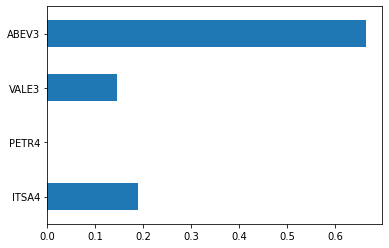

In [ ]:
pd.Series(pesos_vol).plot.barh();

In [ ]:
mv.portfolio_performance(verbose=True, risk_free_rate=selic_aa)

Expected annual return: -8.1%
Annual volatility: 20.3%
Sharpe Ratio: -0.71


(-0.0808667868606238, 0.20329874567314016, -0.7125808198223607)

In [ ]:
pesos_vol = pesos_vol.values()
pesos_vol = list(pesos_vol)
pesos_vol = np.array(pesos_vol)
pesos_vol

array([0.1896 , 0.     , 0.14521, 0.66519])

In [ ]:
#Comparar a volatilidade

vol_otimizada = np.sqrt(np.dot(pesos_vol.T, np.dot(cov_fut, pesos_vol)))
vol_otimizada = vol_otimizada*np.sqrt(252)
vol_otimizada

0.32518660311495384

In [ ]:
#Comparar retorno
retorno_min_vol = cf_anualizado.dot(pesos_vol)
retorno_min_vol

0.030299401253053443

###7.1.1. Função Regularizadora

In [ ]:
from pypfopt import objective_functions

In [ ]:
mv_2 = EfficientFrontier(mme,exp_cov)
mv_2.add_objective(objective_functions.L2_reg, gamma=0.1)
mv_2.min_volatility()
pesos_2 = mv_2.clean_weights()
pesos_2

OrderedDict([('ITSA4', 0.26646),
             ('PETR4', 0.08473),
             ('VALE3', 0.23586),
             ('ABEV3', 0.41294)])

In [ ]:
pesos_2 = pesos_2.values()
pesos_2 = list(pesos_2)
pesos_2 = np.array(pesos_2)
pesos_2

array([0.26646, 0.08473, 0.23586, 0.41294])

In [ ]:
vol_otimizada2 = np.sqrt(np.dot(pesos_2.T, np.dot(cov_fut, pesos_2)))
vol_otimizada2 = vol_otimizada2*np.sqrt(252)
vol_otimizada2

0.3211687363501976

In [ ]:
retorno_min_vol_2 = cf_anualizado.dot(pesos_2)
retorno_min_vol_2

0.04932739531699506

##7.2. Modelo de Otimização Risco Eficiente

Maximizar o retorno de um portfólio dado um target de risco

In [ ]:
risco_eficiente = EfficientFrontier(mme, exp_cov)
risco_eficiente.efficient_risk(target_volatility=0.25)
re_pesos = risco_eficiente.clean_weights(rounding=2)
re_pesos

OrderedDict([('ITSA4', 0.58),
             ('PETR4', 0.04),
             ('VALE3', 0.28),
             ('ABEV3', 0.1)])

In [ ]:
risco_eficiente.portfolio_performance(verbose=True, risk_free_rate=selic_aa)

Expected annual return: 24.5%
Annual volatility: 25.0%
Sharpe Ratio: 0.72


(0.2452352883708576, 0.2500000008124674, 0.724941151127466)

In [ ]:
re_pesos = re_pesos.values()
re_pesos = list(re_pesos)
re_pesos = np.array(re_pesos)
re_pesos

array([0.58, 0.04, 0.28, 0.1 ])

In [ ]:
vol_re_otimizada = np.sqrt(np.dot(re_pesos.T, np.dot(cov_fut, re_pesos)))
vol_re_otimizada = vol_re_otimizada*np.sqrt(252)
vol_re_otimizada

0.3304167622144683

In [ ]:
retorno_re_pesos = cf_anualizado.dot(re_pesos)
retorno_re_pesos

0.05788315086560185

##7.3. Modelo de Otimização Retorno Eficiente

Minimizaro risco dado um target de retorno

In [ ]:
retorno_eficiente = EfficientFrontier(mme, exp_cov)
retorno_eficiente.efficient_return(target_return=0.25)
pesos_retorno_eficiente = retorno_eficiente.clean_weights()
pesos_retorno_eficiente

OrderedDict([('ITSA4', 0.58368),
             ('PETR4', 0.04332),
             ('VALE3', 0.27859),
             ('ABEV3', 0.09441)])

In [ ]:
pesos_retorno_eficiente = pesos_retorno_eficiente.values()
pesos_retorno_eficiente = list(pesos_retorno_eficiente)
pesos_retorno_eficiente = np.array(pesos_retorno_eficiente)
pesos_retorno_eficiente

array([0.58368, 0.04332, 0.27859, 0.09441])

In [ ]:
vol_re_otimizada2 = np.sqrt(np.dot(pesos_retorno_eficiente.T, np.dot(cov_fut, pesos_retorno_eficiente)))
vol_re_otimizada2 = vol_re_otimizada2*np.sqrt(252)
vol_re_otimizada2

0.3311534907066422

In [ ]:
retorno_eficiente_2 = cf_anualizado.dot(pesos_retorno_eficiente)
retorno_eficiente_2

0.05785234794401577

##7.4. Portfólio Max Sharpe

Modelo de maximização de Sharpe Ratio tem como objetivo maximzar o resultado da expressão (RiskFree - Retorno Esperado)/Volatilidade

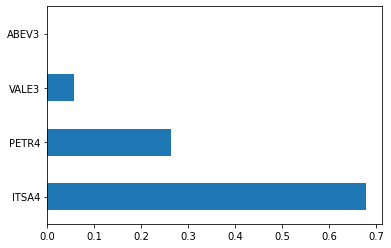

In [ ]:
msharpe = EfficientFrontier(mme, exp_cov)
msharpe.max_sharpe(risk_free_rate=selic_aa)
sharpe_pesos = msharpe.clean_weights()
pd.Series(sharpe_pesos).plot.barh();

In [ ]:
sharpe_pesos = sharpe_pesos.values()
sharpe_pesos = list(sharpe_pesos)
sharpe_pesos = np.array(sharpe_pesos)

In [ ]:
volsharpe = np.sqrt(np.dot(sharpe_pesos.T, np.dot(cov_fut, sharpe_pesos)))
volsharpe = volsharpe*np.sqrt(252)
volsharpe

In [ ]:
retorno_sharpe = cf_anualizado.dot(sharpe_pesos)
retorno_sharpe

In [ ]:
msharpe.portfolio_performance(verbose=True, risk_free_rate=selic_aa)

Expected annual return: 36.9%
Annual volatility: 31.0%
Sharpe Ratio: 0.99


(0.36924780851238914, 0.30962018536100533, 0.9858782564724643)

##8. Cenários Avançados de Otimização

###8.1. Criando nova *carteira*

In [ ]:
ativos = ['ITSA4', 'PETR4', 'VALE3', 'ABEV3', 'IGTA3', 'BRML3','BBDC4','BBAS3','LREN3','RENT3']

inicio = '01/01/2017'
fim='31/12/2020'

carteira = pd.DataFrame()

for i in ativos:
  df_cenario = investpy.get_stock_historical_data(stock=i, country='Brazil', from_date=inicio, to_date=fim).Close
  df_cenario.rename(i,inplace=True)
  df_cenario.columns = [i]
  carteira = pd.concat([carteira, df_cenario], axis=1)
  carteira.index.name="Date"
carteira

,ITSA4,PETR4,VALE3,ABEV3,IGTA3,BRML3,BBDC4,BBAS3,LREN3,RENT3
Date,,,,,,,,,,
2017-01-02,6.25,14.06,25.06,15.36,26.62,10.45,13.98,25.03,20.43,10.81
2017-01-03,6.53,14.87,26.17,15.67,27.13,11.03,14.57,26.18,21.05,11.27
2017-01-04,6.57,14.87,25.70,15.55,27.83,11.01,14.48,26.04,20.87,11.45
2017-01-05,6.63,15.11,26.68,15.63,28.44,11.26,14.64,25.98,20.67,11.28
2017-01-06,6.60,15.02,25.97,15.50,28.60,11.15,14.73,26.26,20.43,11.27
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,11.40,27.28,86.94,15.51,36.49,9.85,24.18,38.29,43.16,64.88
2020-12-23,11.67,27.95,87.36,15.50,36.96,10.01,24.73,38.92,43.72,66.60
2020-12-28,11.80,28.18,87.31,15.77,37.58,10.25,24.97,39.35,43.97,66.70


In [ ]:
#Adicionando renda fixa

search_results = investpy.search_quotes(text='tesouro', products=['bonds'], countries=['brazil'], n_results=30)

for search_result in search_results[7:8]:
  print(search_result)

{"id_": 1089896, "name": "Tesouro IPCA + NTNB 6 15-May-2035", "symbol": "NTB051535=", "country": "brazil", "tag": "/rates-bonds/ntnb-6-15-may-2035", "pair_type": "bonds", "exchange": "OTC Bonds"}


In [ ]:
ipca_2035 = search_result.retrieve_historical_data(from_date=inicio,to_date=fim)

In [ ]:
ipca_2035

,Open,High,Low,Close,Change Pct
Date,,,,,
2017-01-02,3071.644,3071.644,3071.644,3071.644,2.79
2017-01-03,3065.696,3065.696,3065.696,3065.696,-0.19
2017-01-04,3063.069,3063.069,3063.069,3063.069,-0.09
2017-01-05,3067.052,3067.052,3067.052,3067.052,0.13
2017-01-06,3057.831,3057.831,3057.831,3057.831,-0.30
...,...,...,...,...,...
2020-12-21,4384.612,4420.040,4384.612,4406.710,-0.09
2020-12-22,4435.510,4435.510,4422.140,4422.140,0.35
2020-12-23,4430.111,4430.111,4416.753,4416.750,-0.12


In [ ]:
ipca_2035 = ipca_2035.rename({'Close':'TesouroIPCA'}, axis=1)

In [ ]:
ipca_2035 = ipca_2035['TesouroIPCA']
ipca_2035

Date
2017-01-02    3071.644
2017-01-03    3065.696
2017-01-04    3063.069
2017-01-05    3067.052
2017-01-06    3057.831
                ...   
2020-12-21    4406.710
2020-12-22    4422.140
2020-12-23    4416.750
2020-12-28    4435.730
2020-12-29    4471.760
Name: TesouroIPCA, Length: 973, dtype: float64

In [ ]:
carteira = pd.merge(carteira, ipca_2035, how='inner', left_index=True, right_index=True)
carteira

,ITSA4,PETR4,VALE3,ABEV3,IGTA3,BRML3,BBDC4,BBAS3,LREN3,RENT3,TesouroIPCA
Date,,,,,,,,,,,
2017-01-02,6.25,14.06,25.06,15.36,26.62,10.45,13.98,25.03,20.43,10.81,3071.644
2017-01-03,6.53,14.87,26.17,15.67,27.13,11.03,14.57,26.18,21.05,11.27,3065.696
2017-01-04,6.57,14.87,25.70,15.55,27.83,11.01,14.48,26.04,20.87,11.45,3063.069
2017-01-05,6.63,15.11,26.68,15.63,28.44,11.26,14.64,25.98,20.67,11.28,3067.052
2017-01-06,6.60,15.02,25.97,15.50,28.60,11.15,14.73,26.26,20.43,11.27,3057.831
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-21,11.38,27.02,86.86,15.42,37.07,10.09,23.69,37.79,43.95,65.74,4406.710
2020-12-22,11.40,27.28,86.94,15.51,36.49,9.85,24.18,38.29,43.16,64.88,4422.140
2020-12-23,11.67,27.95,87.36,15.50,36.96,10.01,24.73,38.92,43.72,66.60,4416.750


In [ ]:
#Matriz de Covariancia

cov_matrix = risk_models.CovarianceShrinkage(carteira).ledoit_wolf()

In [ ]:
#Retorno estimado

selic_aa2 = 0.0190
selic_diaria2 = (1+selic_aa2)**(1/252)-1

In [ ]:
#Obter Ibovespa

ibov2 = investpy.get_index_historical_data('Bovespa', country='Brazil', from_date=inicio,to_date=fim)
ibov2 = pd.DataFrame(ibov2['Close'])

In [ ]:
capm_carteira = expected_returns.capm_return(carteira, market_prices=ibov2, risk_free_rate=selic_diaria2)
capm_carteira

ITSA4          0.303368
PETR4          0.386293
VALE3          0.261243
ABEV3          0.165679
IGTA3          0.272307
BRML3          0.312656
BBDC4          0.354992
BBAS3          0.397150
LREN3          0.297542
RENT3          0.315008
TesouroIPCA    0.054912
Name: mkt, dtype: float64

###9.Long and Short

In [ ]:
ls = EfficientFrontier(capm_carteira, cov_matrix, weight_bounds=(None,None))
ls.min_volatility()
ls_pesos = ls.clean_weights()
ls_pesos

OrderedDict([('ITSA4', 0.04338),
             ('PETR4', -0.01737),
             ('VALE3', 0.08821),
             ('ABEV3', 0.10084),
             ('IGTA3', -0.00995),
             ('BRML3', -0.03826),
             ('BBDC4', 0.01337),
             ('BBAS3', -0.11305),
             ('LREN3', 0.02197),
             ('RENT3', 0.01678),
             ('TesouroIPCA', 0.89407)])

##10. Restrições Setoriais

In [ ]:
#Trabalhar com modelos proprietários de estimativa de retorno

ativos = ['ITSA4', 'PETR4', 'VALE3', 'ABEV3', 'IGTA3', 'BRML3','BBDC4','BBAS3','LREN3','RENT3', 'TesouroIPCA']

retornos_estimados = np.array([0.1,0.1,0.14,0.08,0.1,0.09,0.08,0.1,0.07,0.09,0.05])

retorno_analista = pd.Series(data=retornos_estimados,index=ativos)
retorno_analista

ITSA4          0.10
PETR4          0.10
VALE3          0.14
ABEV3          0.08
IGTA3          0.10
BRML3          0.09
BBDC4          0.08
BBAS3          0.10
LREN3          0.07
RENT3          0.09
TesouroIPCA    0.05
dtype: float64

In [ ]:
sector_mapper ={"ITSA4": "Bancos",
                "PETR4": "Commodities",
                "VALE3": "Commodities",
                "ABEV3": "Varejo",
                "IGTA3": "Shoppings",
                "BRML3": "Shoppings",
                "BBDC4": "Bancos",
                "BBAS3": "Bancos",
                "LREN3": "Varejo",
                "RENT3": "Varejo",
                "TesouroIPCA": "Renda Fixa"}

In [ ]:
sector_lower = {"Commodities": 0.05} #pelo menos 5% ou mais
sector_upper = {"Varejo": 0.10} #menos que 10% alocado em varejo

In [ ]:
restricao_setorial = EfficientFrontier(retorno_analista, cov_matrix)
restricao_setorial.add_objective(objective_functions.L2_reg, gamma=0.1)
restricao_setorial.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
restricao_setorial.efficient_risk(target_volatility=0.25)
pesos_restricao = restricao_setorial.clean_weights()
pesos_restricao



OrderedDict([('ITSA4', 0.14221),
             ('PETR4', 0.08701),
             ('VALE3', 0.32386),
             ('ABEV3', 0.06135),
             ('IGTA3', 0.13618),
             ('BRML3', 0.06115),
             ('BBDC4', 0.02518),
             ('BBAS3', 0.0871),
             ('LREN3', 0.0),
             ('RENT3', 0.03865),
             ('TesouroIPCA', 0.03733)])

###11. Restrição Específica

In [ ]:
#Carregar o modelo

restricao_ativo = EfficientFrontier(retorno_analista, cov_matrix)

#Construir a restrição 

tesouro = restricao_ativo.tickers.index("TesouroIPCA")
restricao_ativo.add_constraint(lambda w:w[tesouro] >=0.10)

#realizar otimização
restricao_ativo.max_sharpe()

#buscar os pesos

pesos_ativo = restricao_ativo.clean_weights()
pesos_ativo


OrderedDict([('ITSA4', 0.08172),
             ('PETR4', 0.0),
             ('VALE3', 0.29393),
             ('ABEV3', 0.10728),
             ('IGTA3', 0.05761),
             ('BRML3', 0.0),
             ('BBDC4', 0.0),
             ('BBAS3', 0.0),
             ('LREN3', 0.0),
             ('RENT3', 0.0),
             ('TesouroIPCA', 0.45946)])

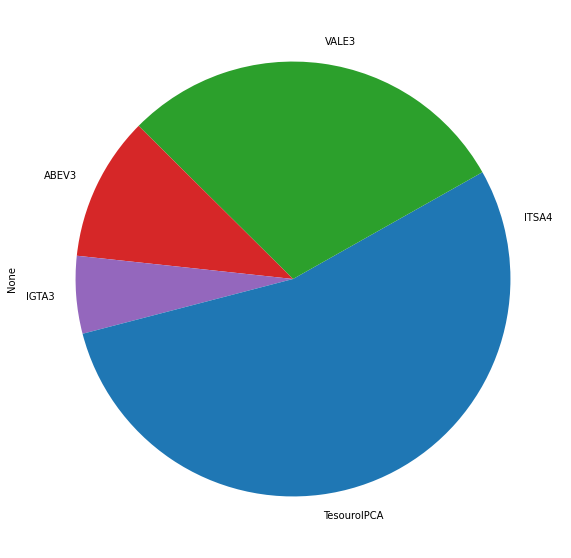

In [ ]:
pd.Series(pesos_ativo).plot.pie(figsize=(10,10))

###12.Otimização Semivariancia

Otimizando um portfólio que utiliza como objetivo a minimização da semivariancia de acordo com uma restriçao de retorno
- Referência: Estrada, J (2007). Mean-Semivariance Optimization: A Heuristic Approach.

In [ ]:
semicov = risk_models.semicovariance(carteira, benchmark=0)
semicov

,ITSA4,PETR4,VALE3,ABEV3,IGTA3,BRML3,BBDC4,BBAS3,LREN3,RENT3,TesouroIPCA
ITSA4,0.048811,0.043258,0.021531,0.029382,0.039852,0.047543,0.045130,0.053457,0.040264,0.038566,0.011704
PETR4,0.043258,0.101849,0.036087,0.033092,0.047608,0.056219,0.049328,0.063372,0.043236,0.046914,0.016361
VALE3,0.021531,0.036087,0.070263,0.018276,0.022439,0.027174,0.024968,0.028495,0.023426,0.025745,0.005052
ABEV3,0.029382,0.033092,0.018276,0.041551,0.031736,0.036226,0.029949,0.035041,0.032452,0.029520,0.008571
IGTA3,0.039852,0.047608,0.022439,0.031736,0.061016,0.061108,0.043375,0.053155,0.046036,0.046015,0.014420
BRML3,0.047543,0.056219,0.027174,0.036226,0.061108,0.081348,0.050953,0.063383,0.054101,0.052966,0.016034
BBDC4,0.045130,0.049328,0.024968,0.029949,0.043375,0.050953,0.054775,0.058382,0.041788,0.041569,0.012940
BBAS3,0.053457,0.063372,0.028495,0.035041,0.053155,0.063383,0.058382,0.082566,0.051590,0.050361,0.017799
LREN3,0.040264,0.043236,0.023426,0.032452,0.046036,0.054101,0.041788,0.051590,0.064808,0.045293,0.012048
RENT3,0.038566,0.046914,0.025745,0.029520,0.046015,0.052966,0.041569,0.050361,0.045293,0.069389,0.012273


In [ ]:
from pypfopt import EfficientSemivariance

In [ ]:
retornos_df = expected_returns.returns_from_prices(carteira)
retornos_df = retornos_df.dropna()

In [ ]:
ef_semiv = EfficientSemivariance(capm_carteira, retornos_df)
ef_semiv.efficient_return(0.2)
ef_pesos = ef_semiv.clean_weights()
ef_pesos

OrderedDict([('ITSA4', 0.02271),
             ('PETR4', 0.01076),
             ('VALE3', 0.19681),
             ('ABEV3', 0.0476),
             ('IGTA3', 0.0),
             ('BRML3', 0.0),
             ('BBDC4', 0.20116),
             ('BBAS3', 0.0),
             ('LREN3', 0.03027),
             ('RENT3', 0.08571),
             ('TesouroIPCA', 0.40499)])

In [ ]:
ef_semiv.portfolio_performance(verbose=True, risk_free_rate=selic_diaria2)

Expected annual return: 20.0%
Annual semi-deviation: 12.7%
Sortino Ratio: 1.58


(0.20000000000000004, 0.1268108408040784, 1.5765632215829073)

###13. Hierarchical Risk Parity
-Marcos López de Prado: Building Diversified Portfolios that Outperform Out of Sample. The Journal of Portfolio Management, 42(4), 59–69.

In [ ]:
from pypfopt import HRPOpt

In [ ]:
hrp_portfolio = HRPOpt(retornos_df)

In [ ]:
hrp_portfolio.optimize()

OrderedDict([('ABEV3', 0.11915090473835604),
             ('BBAS3', 0.02929615397011615),
             ('BBDC4', 0.02255000650071865),
             ('BRML3', 0.01957307597835427),
             ('IGTA3', 0.03818904885421308),
             ('ITSA4', 0.027219058278358),
             ('LREN3', 0.03855242337344744),
             ('PETR4', 0.01660740586568325),
             ('RENT3', 0.03131697988978764),
             ('TesouroIPCA', 0.5882769945631984),
             ('VALE3', 0.06926794798776706)])

In [ ]:
hrp_portfolio.portfolio_performance(verbose=True, risk_free_rate=selic_diaria2)

Expected annual return: 15.2%
Annual volatility: 14.7%
Sharpe Ratio: 1.03


(0.15154715532900723, 0.14667426813870393, 1.0327132697569068)

In [ ]:
from pypfopt import plotting

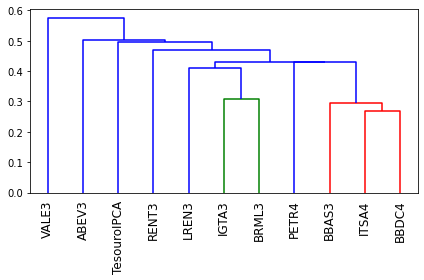

In [ ]:
plotting.plot_dendrogram(hrp_portfolio)